# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620,2
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,1
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,1
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,0
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,0
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

## Clean the data

In [2]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [3]:
def show_distribution(var_data):
    """Function to show summary stats and distribution for a column"""

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(
        var_data.name, 
        f"\nMinimum:{min_val:.2f}\nMean:{mean_val:.2f}\nMedian:{med_val:.2f}\nMode:{mod_val:.2f}\nMaximum:{max_val:.2f}\n"
    )

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel("Frequency")

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = "gray", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=mean_val, color = "cyan", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=med_val, color = "red", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=mod_val, color = "yellow", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=max_val, color = "gray", linestyle="dashed", linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel("Value")

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

Alcohol 
Minimum:11.03
Mean:13.00
Median:13.05
Mode:12.37
Maximum:14.83

Malic_acid 
Minimum:0.74
Mean:2.34
Median:1.87
Mode:1.73
Maximum:5.80

Ash 
Minimum:1.36
Mean:2.37
Median:2.36
Mode:2.28
Maximum:3.23

Alcalinity 
Minimum:10.60
Mean:19.49
Median:19.50
Mode:20.00
Maximum:30.00

Magnesium 
Minimum:70.00
Mean:99.74
Median:98.00
Mode:88.00
Maximum:162.00

Phenols 
Minimum:0.98
Mean:2.30
Median:2.35
Mode:2.20
Maximum:3.88

Flavanoids 
Minimum:0.34
Mean:2.03
Median:2.13
Mode:2.65
Maximum:5.08

Nonflavanoids 
Minimum:0.13
Mean:0.36
Median:0.34
Mode:0.26
Maximum:0.66

Proanthocyanins 
Minimum:0.41
Mean:1.59
Median:1.56
Mode:1.35
Maximum:3.58

Color_intensity 
Minimum:1.28
Mean:5.06
Median:4.69
Mode:2.60
Maximum:13.00

Hue 
Minimum:0.48
Mean:0.96
Median:0.96
Mode:1.04
Maximum:1.71

OD280_315_of_diluted_wines 
Minimum:1.27
Mean:2.61
Median:2.78
Mode:2.87
Maximum:4.00

Proline 
Minimum:278.00
Mean:746.89
Median:673.50
Mode:520.00
Maximum:1680.00

WineVariety 
Minimum:0.00
Mean:0.94
Median:1

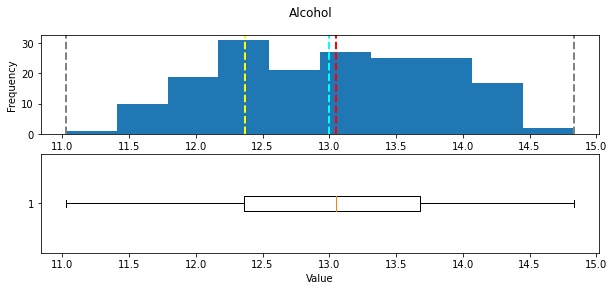

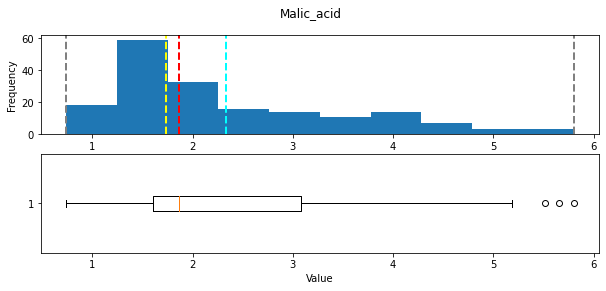

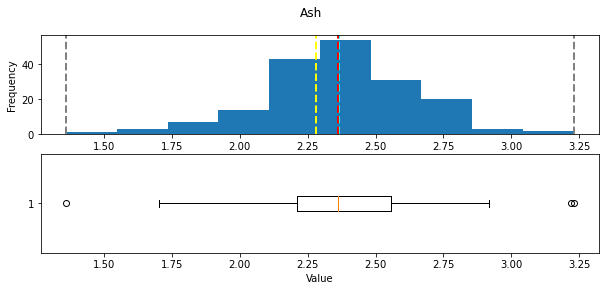

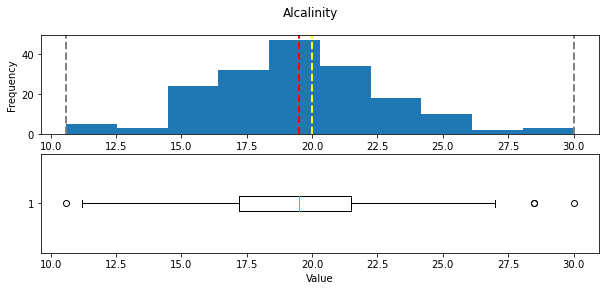

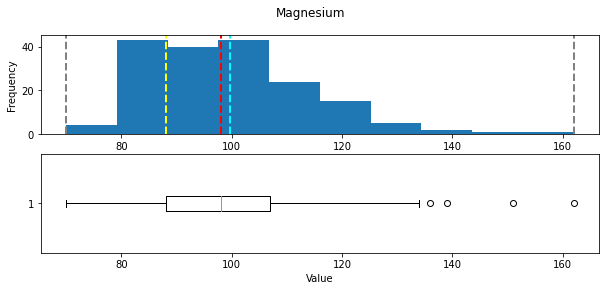

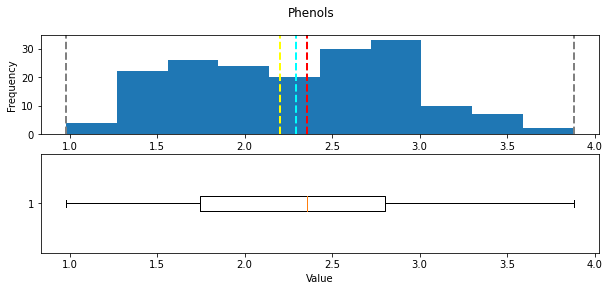

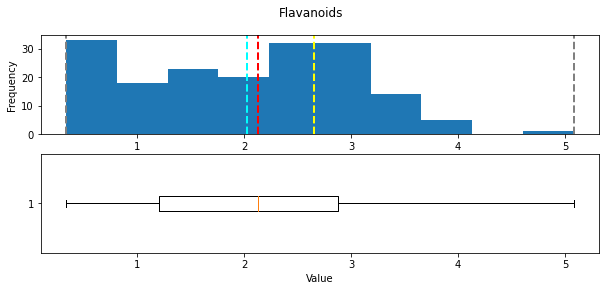

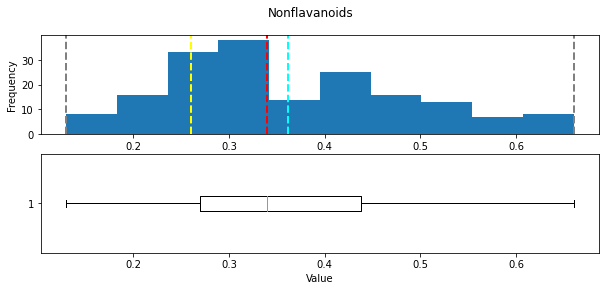

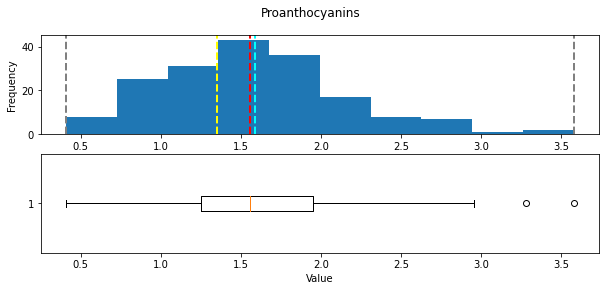

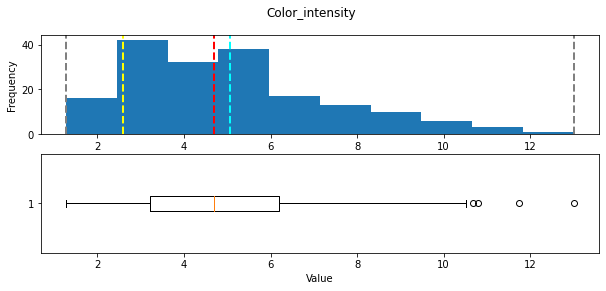

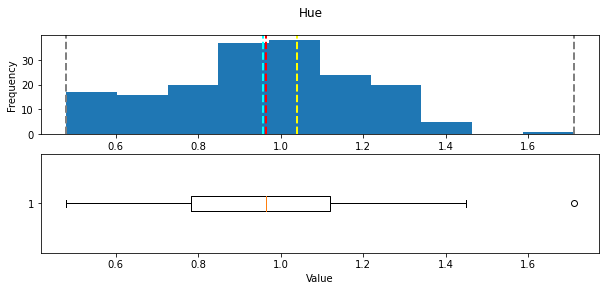

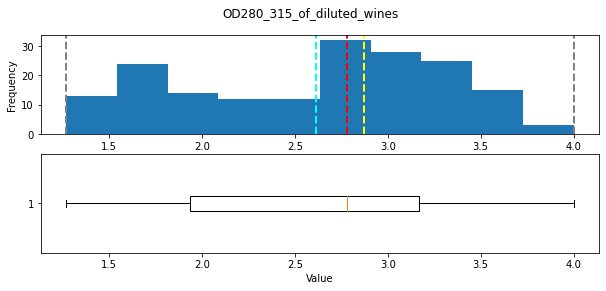

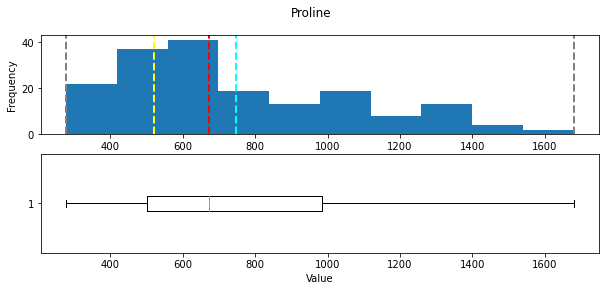

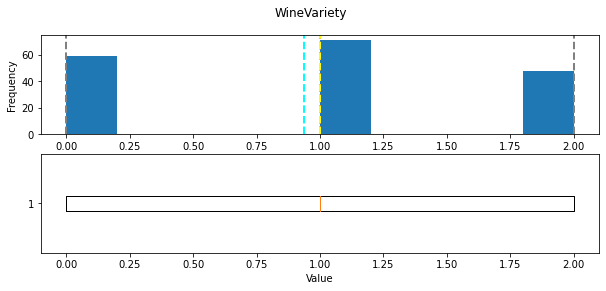

In [4]:
numeric_columns = ["Alcohol", "Malic_acid", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins", "Color_intensity", "Hue", "OD280_315_of_diluted_wines", "Proline", "WineVariety"]
for col in numeric_columns:
    show_distribution(data[col])

## Feature distribution against label values

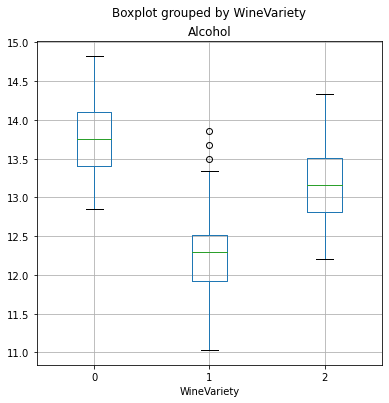

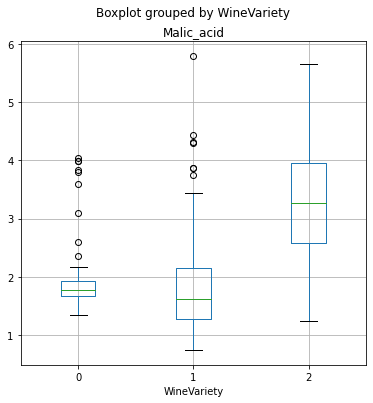

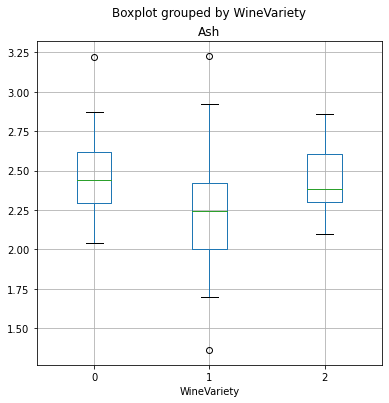

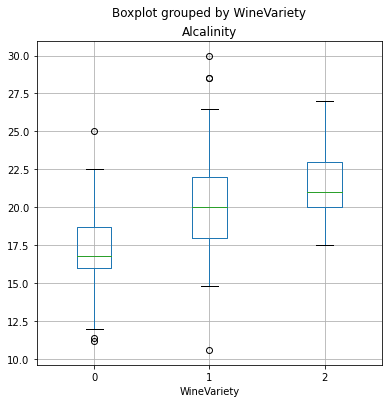

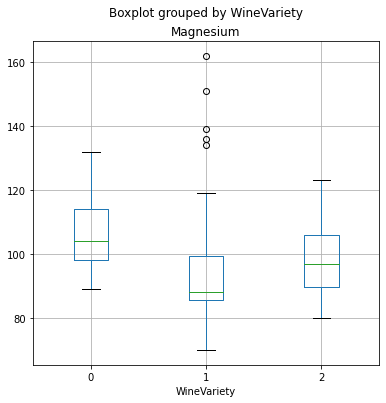

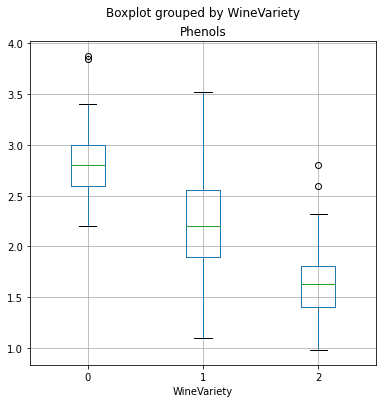

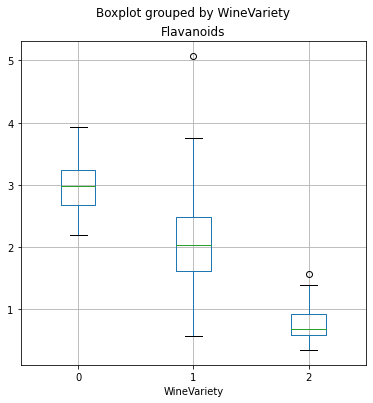

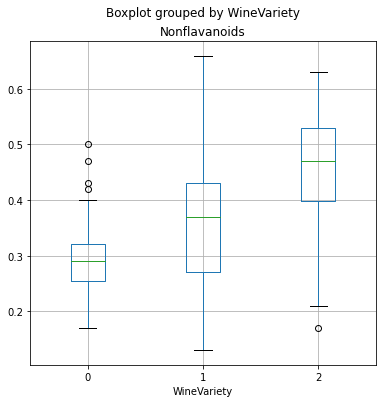

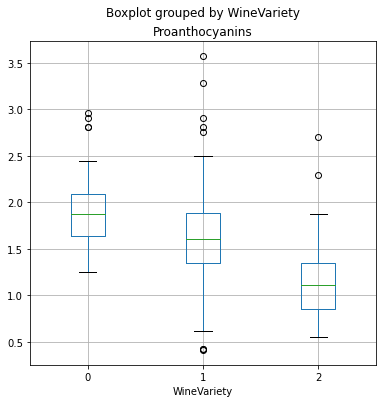

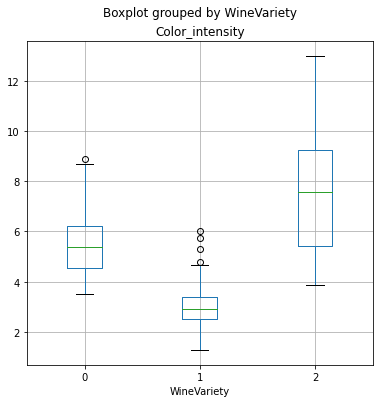

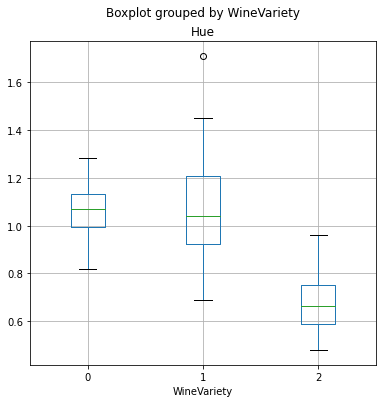

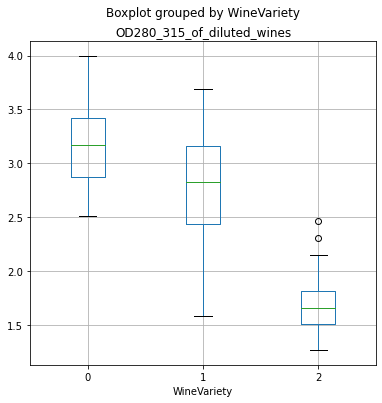

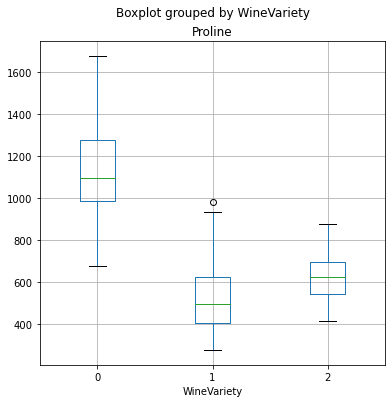

In [5]:
features = ["Alcohol", "Malic_acid", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins", "Color_intensity", "Hue", "OD280_315_of_diluted_wines", "Proline"]
label = "WineVariety"
for col in features:
    data.boxplot(column=col, by=label, figsize=(6,6))
    plt.title(col)
plt.show()

## Split training data

In [6]:
features_to_use = ["Alcohol", "Malic_acid", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins", "Color_intensity", "Hue", "OD280_315_of_diluted_wines", "Proline"]
label = "WineVariety"

X, y = data[features_to_use].values, data[label].values

# 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

print(f"Training Set: {X_train.shape[0]} rows\nTest Set: {X_test.shape[0]} rows")

Training Set: 124 rows
Test Set: 54 rows


## Create the model

In [7]:
# Define preprocessing for numeric columns (scale them)
feature_columns = list(range(13)) # all 13 feature columns
feature_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Create preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ("preprocess", feature_transformer, feature_columns)
])

In [8]:
# Create training pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", SVC(probability=True))
])

In [9]:
# fit the pipeline to train a multi class classification model on the training set
model = pipeline.fit(X_train, y_train)

In [10]:
print(model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('preprocess',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])],
                                   

## Evaluate the model

In [11]:
# Get predictions from test data
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
wine_classes = ["Variety A", "Variety B", "Variety C"]

In [12]:
mcm = confusion_matrix(y_test, predictions)
print(mcm)

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


In [13]:
# Overall metrics
print("Overall Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions, average="macro"))
print("Overall Recall:", recall_score(y_test, predictions, average="macro"))
print("Average AUC:", roc_auc_score(y_test, probabilities, multi_class="ovr"))

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0


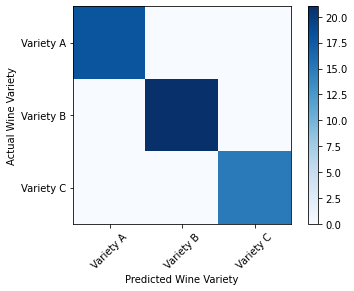

In [14]:
# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=45)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Wine Variety")
plt.ylabel("Actual Wine Variety")
plt.show()

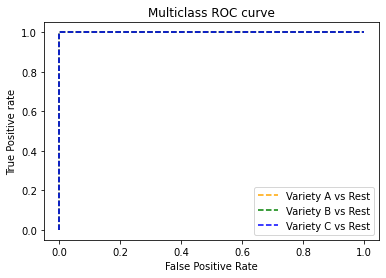

In [15]:
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh = {}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label=f"{wine_classes[0]} vs Rest")
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label=f"{wine_classes[1]} vs Rest")
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label=f"{wine_classes[2]} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [16]:
# Save the model as a pickle file
filename = './wine_variety_model.pkl'
joblib.dump(model, filename)

['./wine_variety_model.pkl']

In [17]:
# Load the model from the file
loaded_model = joblib.load(filename)

In [18]:
# New data to use the model on
X_new = np.array([
    [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
    [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]
])

In [19]:
# Get predictions using the new data
predictions = loaded_model.predict(X_new)

In [20]:
print("Predictions:")
for prediction in predictions:
    print(prediction, '(' + wine_classes[prediction] +')')

Predictions:
0 (Variety A)
1 (Variety B)
